In [33]:
import random
import requests
import urllib3
urllib3.disable_warnings()
import pandas as pd
import numpy as np
import re
import string
import time
import win32com.client
from datetime import date, timedelta
import os
from os import listdir
from os.path import join
import shutil
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [34]:
df = pd.read_excel(r'D:\Ritesh\bhim\RAW_bhim.xlsx',sheet_name = 'Girnar')

In [20]:
df

,NPS_cat,"Basis your recent experience with Cardekho Gaadi Store, how likely are you to recommend Cardekho Gaadi Store to your family & friends (rate us on a scale of 0 to 10 where 0 being the lowest and 10 being the highest)","Basis your appointment booking experience, how likely are you to recommend us to your family & friends?","Basis your interaction with our executive before inspection, how likely are you to recommend us to your family & friends?","Basis your car inspection experience, how likely are you to recommend us to your family & friends?","Basis your experience after inspection, how likely are you to recommend us to your family & friends?","Basis your overall price discussion experience, how likely are you to recommend us to your family & friends?",Unnamed: 7
0,Detractors,1,0,3,2,0,0,NaN
1,Detractors,0,0,0,0,5,4,Questions
2,Detractors,0,0,2,10,7,0,"Basis your appointment booking experience, how..."
3,Detractors,1,9,8,8,9,1,Basis your interaction with our executive befo...
4,Detractors,0,6,6,5,5,4,"Basis your car inspection experience, how like..."
...,...,...,...,...,...,...,...,...
1018,Promoters,9,9,9,9,9,8,NaN
1019,Promoters,9,9,10,9,9,9,NaN
1020,Detractors,0,3,6,0,3,0,NaN
1021,Passive,8,10,6,5,5,4,NaN


In [21]:
df.drop(columns=['Unnamed: 7'],inplace = True)

In [22]:
df

,NPS_cat,"Basis your recent experience with Cardekho Gaadi Store, how likely are you to recommend Cardekho Gaadi Store to your family & friends (rate us on a scale of 0 to 10 where 0 being the lowest and 10 being the highest)","Basis your appointment booking experience, how likely are you to recommend us to your family & friends?","Basis your interaction with our executive before inspection, how likely are you to recommend us to your family & friends?","Basis your car inspection experience, how likely are you to recommend us to your family & friends?","Basis your experience after inspection, how likely are you to recommend us to your family & friends?","Basis your overall price discussion experience, how likely are you to recommend us to your family & friends?"
0,Detractors,1,0,3,2,0,0
1,Detractors,0,0,0,0,5,4
2,Detractors,0,0,2,10,7,0
3,Detractors,1,9,8,8,9,1
4,Detractors,0,6,6,5,5,4
...,...,...,...,...,...,...,...
1018,Promoters,9,9,9,9,9,8
1019,Promoters,9,9,10,9,9,9
1020,Detractors,0,3,6,0,3,0
1021,Passive,8,10,6,5,5,4


In [24]:
X = df[['Basis your appointment booking experience, how likely are you to recommend us to your family & friends?','Basis your interaction with our executive before inspection, how likely are you to recommend us to your family & friends?','Basis your car inspection experience, how likely are you to recommend us to your family & friends?','Basis your experience after inspection, how likely are you to recommend us to your family & friends?','Basis your overall price discussion experience, how likely are you to recommend us to your family & friends?']]

In [25]:
X

,"Basis your appointment booking experience, how likely are you to recommend us to your family & friends?","Basis your interaction with our executive before inspection, how likely are you to recommend us to your family & friends?","Basis your car inspection experience, how likely are you to recommend us to your family & friends?","Basis your experience after inspection, how likely are you to recommend us to your family & friends?","Basis your overall price discussion experience, how likely are you to recommend us to your family & friends?"
0,0,3,2,0,0
1,0,0,0,5,4
2,0,2,10,7,0
3,9,8,8,9,1
4,6,6,5,5,4
...,...,...,...,...,...
1018,9,9,9,9,8
1019,9,10,9,9,9
1020,3,6,0,3,0
1021,10,6,5,5,4


In [26]:
Y = df[['NPS_cat']]

In [27]:
Y

,NPS_cat
0,Detractors
1,Detractors
2,Detractors
3,Detractors
4,Detractors
...,...
1018,Promoters
1019,Promoters
1020,Detractors
1021,Passive


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train,Y_train)
pred_xgb = xgb.predict(X_test)
accuracy = accuracy_score(Y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy)


#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(Y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(Y_test,pred_xgb)}")

C:\Users\Q158\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Q158\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy Score: 80.48780487804879
Confusion Matrix : 
 [[135   4   0]
 [ 16   8   5]
 [  9   6  22]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

  Detractors       0.84      0.97      0.90       139
     Passive       0.44      0.28      0.34        29
   Promoters       0.81      0.59      0.69        37

    accuracy                           0.80       205
   macro avg       0.70      0.61      0.64       205
weighted avg       0.78      0.80      0.78       205



In [35]:
def importance_vs_feature_plot(columns, importances):
                df = (pd.DataFrame({'feature' : columns,
                                   'feature importances' : importances})
                    .sort_values('feature importances', ascending=True)
                    .reset_index(drop=True))
                fig, ax = plt.subplots()
                ax.barh(df['feature'], df['feature importances'])


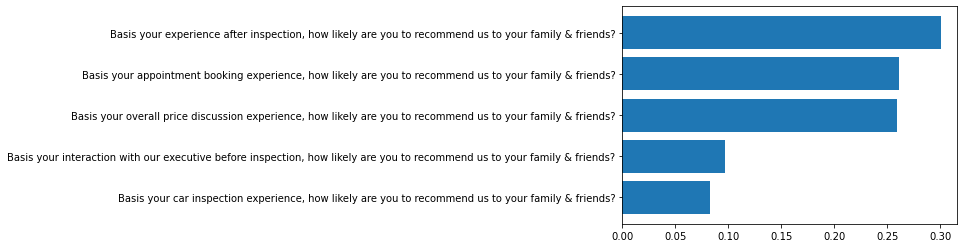

In [36]:
importance_vs_feature_plot( X_train.columns, xgb.feature_importances_ )

In [37]:
output_df = pd.DataFrame({"Categories" : X_train.columns,
                                     "Impact of Categories on NPS" : xgb.feature_importances_}).sort_values(by="Impact of Categories on NPS", ascending=False)

In [40]:
output_df

,Categories,Impact of Categories on NPS
3,"Basis your experience after inspection, how li...",0.300779
0,"Basis your appointment booking experience, how...",0.260947
4,Basis your overall price discussion experience...,0.259249
1,Basis your interaction with our executive befo...,0.096570
2,"Basis your car inspection experience, how like...",0.082455


In [41]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [42]:
output_df

,Categories,Impact of Categories on NPS
3,"Basis your experience after inspection, how likely are you to recommend us to your family & friends?",0.300779
0,"Basis your appointment booking experience, how likely are you to recommend us to your family & friends?",0.260947
4,"Basis your overall price discussion experience, how likely are you to recommend us to your family & friends?",0.259249
1,"Basis your interaction with our executive before inspection, how likely are you to recommend us to your family & friends?",0.096570
2,"Basis your car inspection experience, how likely are you to recommend us to your family & friends?",0.082455


In [43]:
a = df['Basis your experience after inspection, how likely are you to recommend us to your family & friends?'].mean()

In [45]:
b = df['Basis your appointment booking experience, how likely are you to recommend us to your family & friends?'].mean()
c = df['Basis your overall price discussion experience, how likely are you to recommend us to your family & friends?'].mean()
d = df['Basis your interaction with our executive before inspection, how likely are you to recommend us to your family & friends?'].mean()
e = df['Basis your car inspection experience, how likely are you to recommend us to your family & friends?'].mean()

In [46]:
Average_CES_score_of_Questions = [a,b,c,d,e]


In [54]:
output_df = pd.DataFrame({"Categories" : X_train.columns,
                                     "Impact of Categories on NPS" : xgb.feature_importances_}).sort_values(by="Impact of Categories on NPS", ascending=False)

In [55]:
output_df

,Categories,Impact of Categories on NPS
3,"Basis your experience after inspection, how likely are you to recommend us to your family & friends?",0.300779
0,"Basis your appointment booking experience, how likely are you to recommend us to your family & friends?",0.260947
4,"Basis your overall price discussion experience, how likely are you to recommend us to your family & friends?",0.259249
1,"Basis your interaction with our executive before inspection, how likely are you to recommend us to your family & friends?",0.096570
2,"Basis your car inspection experience, how likely are you to recommend us to your family & friends?",0.082455


In [61]:
a = ['Basis your experience after inspection, how likely are you to recommend us to your family & friends?','Basis your appointment booking experience, how likely are you to recommend us to your family & friends?','Basis your overall price discussion experience, how likely are you to recommend us to your family & friends?','Basis your interaction with our executive before inspection, how likely are you to recommend us to your family & friends?','Basis your car inspection experience, how likely are you to recommend us to your family & friends?']

In [62]:
df_ = pd.DataFrame({'Average_CES_score_of_Questions':Average_CES_score_of_Questions, 'Categories':a})

In [63]:
df_

,Average_CES_score_of_Questions,Categories
0,4.882698,"Basis your experience after inspection, how likely are you to recommend us to your family & friends?"
1,5.751711,"Basis your appointment booking experience, how likely are you to recommend us to your family & friends?"
2,3.885630,"Basis your overall price discussion experience, how likely are you to recommend us to your family & friends?"
3,6.237537,"Basis your interaction with our executive before inspection, how likely are you to recommend us to your family & friends?"
4,5.776149,"Basis your car inspection experience, how likely are you to recommend us to your family & friends?"


In [64]:
df_final =pd.merge(output_df,df_,on = 'Categories')

In [65]:
df_final

,Categories,Impact of Categories on NPS,Average_CES_score_of_Questions
0,"Basis your experience after inspection, how likely are you to recommend us to your family & friends?",0.300779,4.882698
1,"Basis your appointment booking experience, how likely are you to recommend us to your family & friends?",0.260947,5.751711
2,"Basis your overall price discussion experience, how likely are you to recommend us to your family & friends?",0.259249,3.885630
3,"Basis your interaction with our executive before inspection, how likely are you to recommend us to your family & friends?",0.096570,6.237537
4,"Basis your car inspection experience, how likely are you to recommend us to your family & friends?",0.082455,5.776149


In [66]:
df_final.to_excel(r'D:\Ritesh\bhim\girnar_sample_data.xlsx')